## All imports line below this

In [110]:
## AI 
from fastai import *

## Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from fastai.data.external import *
from PIL import Image 

## Pull Data In

In [111]:
training_df = pd.read_csv("data/training.csv")

# training_df.head(1)

In [112]:
lookup_df = pd.read_csv("data/IdLookupTable.csv")

lookup_df.head(1)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN


In [120]:
training_df.iloc[0,0:7]

left_eye_center_x          66.033564
left_eye_center_y          39.002274
right_eye_center_x         30.227008
right_eye_center_y         36.421678
left_eye_inner_corner_x    59.582075
left_eye_inner_corner_y    39.647423
left_eye_outer_corner_x    73.130346
Name: 0, dtype: object

## Fix up the data a lil

In [97]:
# find if any NA in the training data
training_df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [98]:
training_df.fillna(method = 'ffill',inplace = True)

## Show an Image

In [99]:
images = training_df['Image']

In [100]:
type(images[1])

str

In [101]:
# turn image string into an array 
arr = np.fromstring(images[1], dtype=int, sep=' ')


In [102]:
print(arr.shape)
print(arr)

(9216,)
[219 215 204 ...   1   1   1]


In [103]:
import math
math.sqrt(9216)
# 96x96 images

96.0

In [104]:
type(arr), type(arr[0])

(numpy.ndarray, numpy.int64)

In [105]:
## Findings: so now we have a numpy array that represents a 96x96 image, now to use some other library to plot it. 

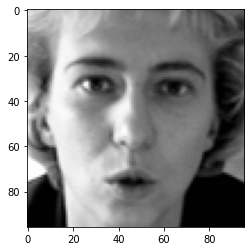

In [106]:
plt.imshow(arr.reshape(96,96),cmap='gray')

## Now, to show the key points on each image

In [107]:
training_df.iloc[1].head()

left_eye_center_x          64.332936
left_eye_center_y          34.970077
right_eye_center_x         29.949277
right_eye_center_y         33.448715
left_eye_inner_corner_x     58.85617
Name: 1, dtype: object

In [108]:
coord_arr = []

for i in range(0,30,2):
    coord = training_df.iloc[1][i],training_df.iloc[1][i+1]
    coord_arr.append(coord)
    

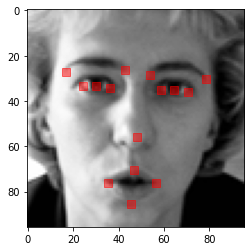

In [109]:
plt.imshow(arr.reshape(96,96),cmap='gray')
coord_arr2 = coord_arr[0:30]
for coord in coord_arr2:
    plt.scatter(coord[0],coord[1],c='r', marker='s', s=50, alpha=.5)
    
    